In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [39]:
%matplotlib notebook

In [4]:
df = pd.read_csv('../outputs/vanillacnn-results-20230111-235430.csv')

In [5]:
df = df.rename(columns={'Unnamed: 0': 'timepoint'})

In [6]:
df_pred = df[['timepoint', 'pred_x', 'pred_y', 'pred_z']]
df_true = df[['timepoint', 'x', 'y', 'z']]

In [7]:
df_pred['sample'] = 'prediction'

/tmp/ipykernel_11094/2154606806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['sample'] = 'prediction'


In [8]:
df_true['sample'] = 'true'

/tmp/ipykernel_11094/1927819534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['sample'] = 'true'


In [9]:
df_pred = df_pred.rename(columns={'pred_x': 'x','pred_y': 'y','pred_z': 'z'})

In [10]:
df_pred.head()

,timepoint,x,y,z,sample
0,0,-255.64128,167.29980,-95.66176,prediction
1,1,-253.39938,167.25514,-95.25044,prediction
2,2,-254.47021,168.61653,-95.48312,prediction
3,3,-255.04613,171.14398,-95.66220,prediction
4,4,-258.36580,170.53789,-95.65898,prediction


In [11]:
sns_df = pd.concat([df_true, df_pred])

In [12]:
sns_df = sns_df.reset_index(drop=True)

In [13]:
sns_df

,timepoint,x,y,z,sample
0,0,-339.18800,78.70800,-110.545000,true
1,1,-339.44200,78.76680,-110.541000,true
2,2,-339.72400,78.83210,-110.537000,true
3,3,-339.94900,78.88430,-110.536000,true
4,4,-340.16100,78.93330,-110.535000,true
...,...,...,...,...,...
6083,3039,-327.59348,144.70189,-122.782930,prediction
6084,3040,-327.78732,144.21828,-123.190840,prediction
6085,3041,-331.64603,147.79747,-123.792480,prediction
6086,3042,-335.42350,148.14990,-123.602905,prediction


<IPython.core.display.Javascript object>


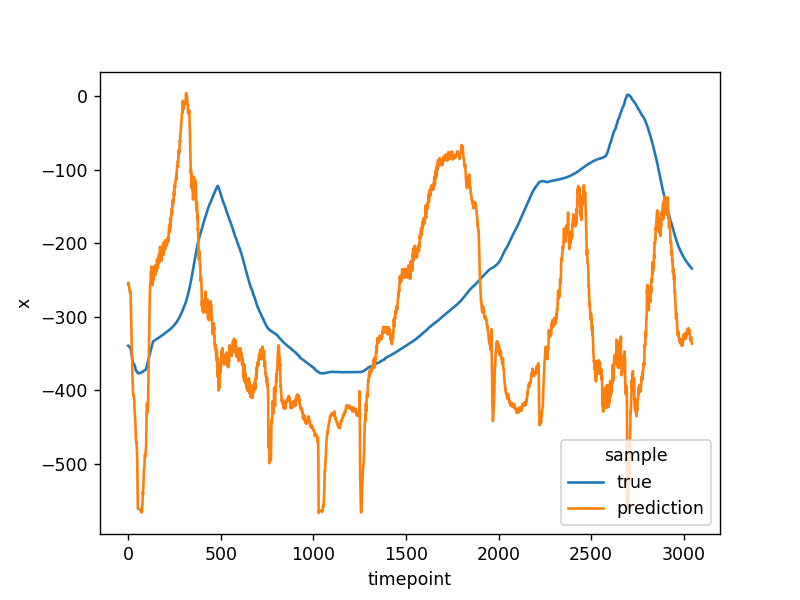

<AxesSubplot: xlabel='timepoint', ylabel='x'>

In [40]:
sns.lineplot(x="timepoint", y="x", hue="sample", data=sns_df)

<IPython.core.display.Javascript object>


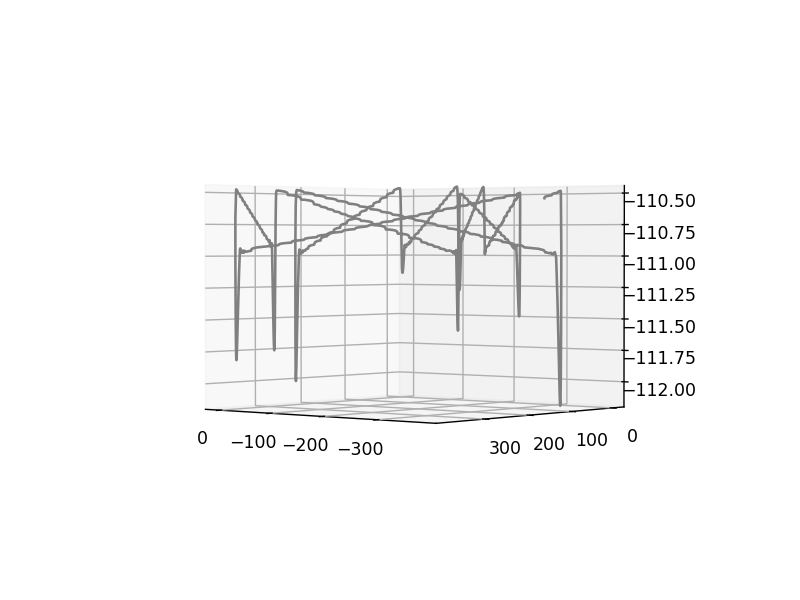

In [41]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [42]:
ax.plot3D(df_true['x'].to_numpy(), df_true['y'].to_numpy(), df_true['z'].to_numpy(), 'gray')